# Lab 2:
## Part 1:

In [7]:
from IPython.display import display, Math

# Chemical reactions given: 
display ('Chemical Reactions given:')
display(Math(r'\varnothing \to X \quad \text{at a rate of } k_1 = 1'))
display(Math(r'X \to Y \quad \text{at a rate of } k_2 = 2'))
display(Math(r'2X + Y \to 3X \quad \text{at a rate of } k_3 = 0.02'))
display(Math(r'X \to \varnothing \quad \text{at a rate of } k_4 = 0.04'))
display ('Volume of the system is constant and equals to 1')

# Reaction 1: 
display ('Reaction 1:')
display(Math(r'\frac{d[X]}{dt} = +k_1'))

# Reaction 2:
display ('Reaction 2:')
display(Math(r'\frac{d[X]}{dt} = k_1 -k_2[X]'))

# Reaction 3:
display ('Reaction 3:')
display(Math(r'\frac{d[X]}{dt} = k_1 -k_[X] + k_3[X]^2[Y]'))

# Reaction 4:
display ('Reaction 4:')
display(Math(r'\frac{d[X]}{dt} = k_1 -k_[X] + k_3[X]^2[Y] - k_4[X]'))

# Writing differential Equation for Y:
display ('Differential Equation for Y (Reaction 1):')
display(Math(r'\frac{d[Y]}{dt} = 0'))
display ('Differential Equation for Y (Reaction 2):')
display(Math(r'\frac{d[Y]}{dt} = k_2[X]'))
display ('Differential Equation for Y (Reaction 3):')
display(Math(r'\frac{d[Y]}{dt} = k_3[X]^2[Y]'))
display ('Differential Equation for Y (Reaction 4):')
display(Math(r'\frac{d[Y]}{dt} = k_3[X]^2[Y]'))


# Now putting everything together:
display ('Putting everything together:')
display(Math(r'\frac{d[X]}{dt} = k_1 -k_2[X] + k_3[X]^2[Y] - k_4[X]'))
display(Math(r'\frac{d[X]}{dt} = 1 -2[X] + 0.02[X]^2[Y] - 0.04[X]'))
display(Math(r'\frac{d[Y]}{dt} = k_2[X] - k_3[X]^2[Y]'))
display(Math(r'\frac{d[Y]}{dt} = 2[X] - 0.02[X]^2[Y]'))







'Chemical Reactions given:'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'Volume of the system is constant and equals to 1'

'Reaction 1:'

<IPython.core.display.Math object>

'Reaction 2:'

<IPython.core.display.Math object>

'Reaction 3:'

<IPython.core.display.Math object>

'Reaction 4:'

<IPython.core.display.Math object>

'Differential Equation for Y (Reaction 1):'

<IPython.core.display.Math object>

'Differential Equation for Y (Reaction 2):'

<IPython.core.display.Math object>

'Differential Equation for Y (Reaction 3):'

<IPython.core.display.Math object>

'Differential Equation for Y (Reaction 4):'

<IPython.core.display.Math object>

'Putting everything together:'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Part 2:

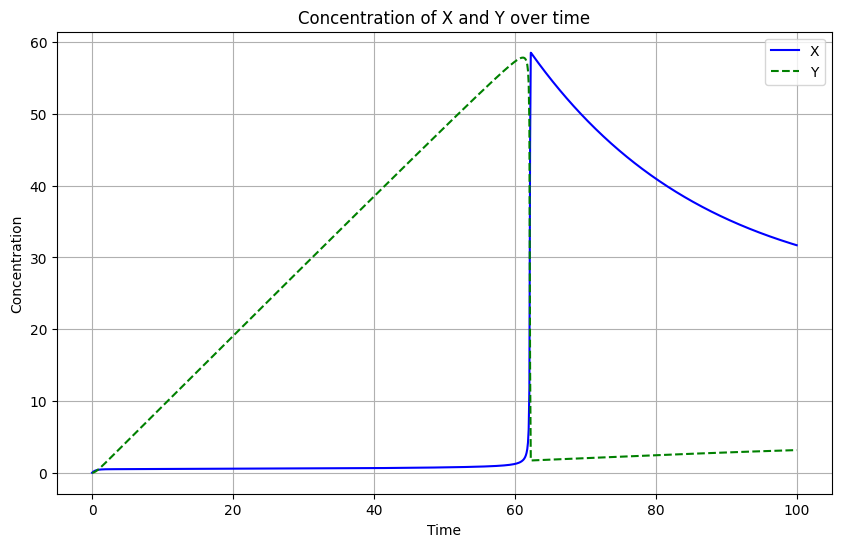

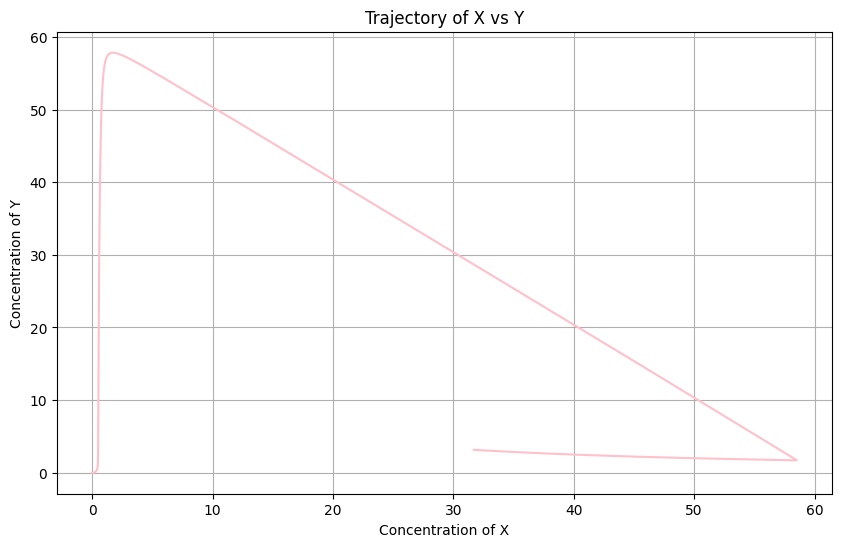

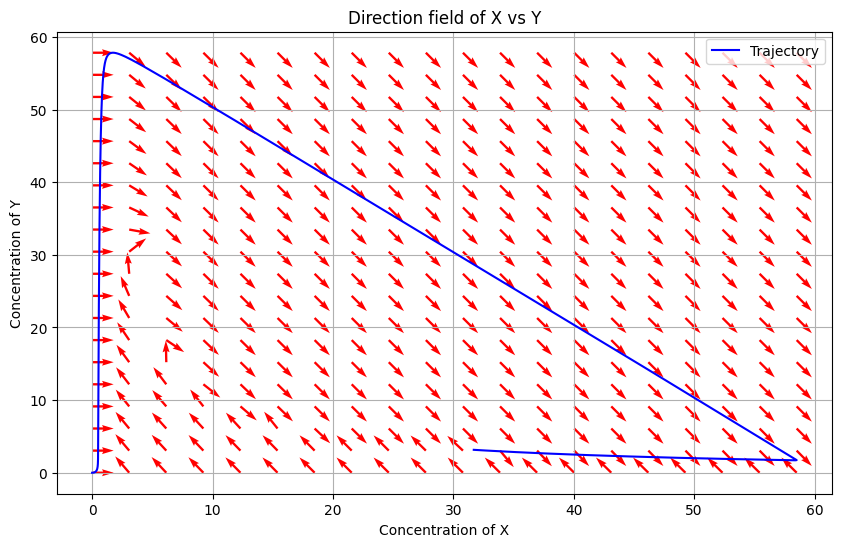

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Reaction rates:
k1 = 1
k2 = 2
k3 = 0.02
k4 = 0.04
# Initial concentrations:
X0 = 0
Y0 = 0

# Differential equations:
def diff_eq(z, t):
    """
    Function to define the system of ODEs given different chemical reactions. 
    
    Parameters:
    z: list of current concentrations of X and Y,
    t: time variable. 

    Returns:
    dXdt: rate of change of X,
    dYdt: rate of change of Y. 
    """
    X = z[0]
    Y = z[1]

    dX_dt = k1 - k2 * X + k3 * X**2 * Y - k4 * X
    dY_dt = k2 * X - k3 * X**2 * Y

    return [dX_dt, dY_dt]

# Time points:
t = np.linspace(0, 100, 1000)

# Solving the ODEs:
z0 = [X0, Y0]
z = odeint(diff_eq, z0, t)

# Extracting the concentrations of X and Y:
X = z[:, 0]
Y = z[:, 1]

# Plot X and Y against time:
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='X', color = 'blue')
plt.plot(t, Y, label='Y', color = 'green', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration of X and Y over time')
plt.legend()
plt.grid()
plt.show()

# Plot the trajectory of X vs Y:
plt.figure(figsize=(10, 6))
plt.plot(X, Y, color = 'pink')
plt.xlabel('Concentration of X')
plt.ylabel('Concentration of Y')
plt.title('Trajectory of X vs Y')
plt.grid()
plt.show()

# Use function plt.quiver to plot a direction field on the trajectory:
# Generate a grid of points in the X-Y plane:
X_grid, Y_grid  = np.meshgrid(np.linspace(0, max(X), 20), np.linspace(0, max(Y), 20))

# Compute the derivatives at grid points:
dX_dt_grid = k1 - k2 * X_grid + k3 * X_grid**2 * Y_grid - k4 * X_grid
dY_dt_grid = k2 * X_grid - k3 * X_grid**2 * Y_grid

# Normalize the derivatives:
magnitude = np.sqrt(dX_dt_grid**2 + dY_dt_grid**2)
dX_dt_grid /= magnitude
dY_dt_grid /= magnitude

# Plot the direction field:
plt.figure(figsize=(10, 6))
plt.quiver(X_grid, Y_grid, dX_dt_grid, dY_dt_grid, color = 'red')
plt.plot(X, Y, color = 'blue', label = 'Trajectory')
plt.xlabel('Concentration of X')
plt.ylabel('Concentration of Y')
plt.title('Direction field of X vs Y')
plt.legend()
plt.grid()
plt.show()





### **Explain the pattern you see:**
1. **Concentration of X and Y Over Time:**
+ X (blue solid line) remains very low and stable initially, then sharply spikes upward at around t=60.
+ Y (green dashed line) steadily increases until around t=60, then suddenly drops, and stabilizes at a low value. 
+ After the peak, X starts decaying slowly, while Y remains low. 
+ In the early phase (t<60), X is being slowly produced from reaction ∅→X. Y is accumulating because X→Y is happening continuously. 
+ At t≈60, there is a sudden peak in X; This suggests that reaction 2X+Y→3X dominates at this time points, rapidly converting Y into X. 
+ After the peak, we observe X slowly declining; this points to degradation (X→∅) and less conversion of Y→X. 
+ Y stabilizes at a low value, meaning that the reaction network reaches a quasi-equilibrium. 
+ In conclusion, the system undergoes a rapid transition at t=60 (2X+Y→3X). 

2. **Trajectory of X vs Y:**
+ The curve starts at (0,0).
+ Y increases, while X stays low. 
+ At some point, X increases rapidly, and Y starts decreasing. 
+ The trajectory follows a downward-sloping curve, setting near a lower X,Y region. 
+ Initially, X is low and Y is increasing because X→Y. 
+ A sharp burst in X is observed, meaning that the feedback reaction (2X+Y→3X) suddenly happens. 
+ After this, the system moves towards a more stable point, where X and Y reach new steady-state values. 
+ In conclusion, the system undergoes a phase transtion, where the nonlinearity in the reaction system causes rapid growth of X, at the expense of Y. 
+ The final state is not oscillating, so it means the system settles to a steady equilibrium. 

3. **Direction Field:**
+ The arrows indicate the direction of movement in the (X,Y) plane. 
+ The trajectory follows the arrows, meaning it correctly aligns with the direction field. 
+ Arrows show that X increases when Y is high, **but** then X starts decreasing after the peak. 
+ The field suggests that the system evolves towards a stable point. 
+ The transition from increasing to decreasing X is clearly visible in the orientation of the arrows. 
+ The system does not show oscillatory behavior, meaing it does not cycle indefinitely. 
+ The vector field confirms our findings on the phase transition behavior based on the trajectory plot. 
+ The final state reaches equilibrium, where X and Y stop changing significantly. 

4. **Conclusions:**
+ The system slowly builds up X and Y at first, but then undergoes a sharp phase transrition where X spikes and Y declines. 
+ After the transition, X gradually declines and Y stabilizes at a low value. 
+ The trajectory plot shows a smooth approach to equilibrium, confirming a stable steady-state solution. 
+ The vector field indicates that the system naturally moves towards equilibrium, and does not oscillate indefinitely. 



## Part 3:

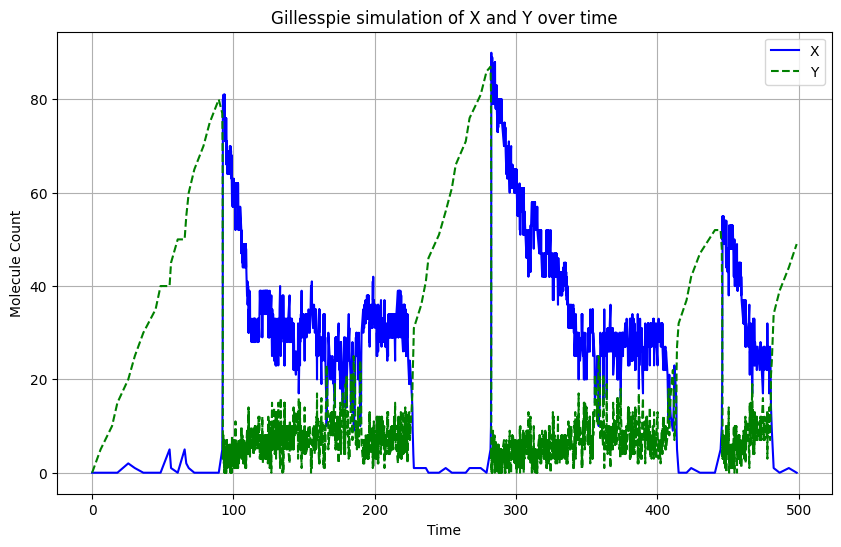

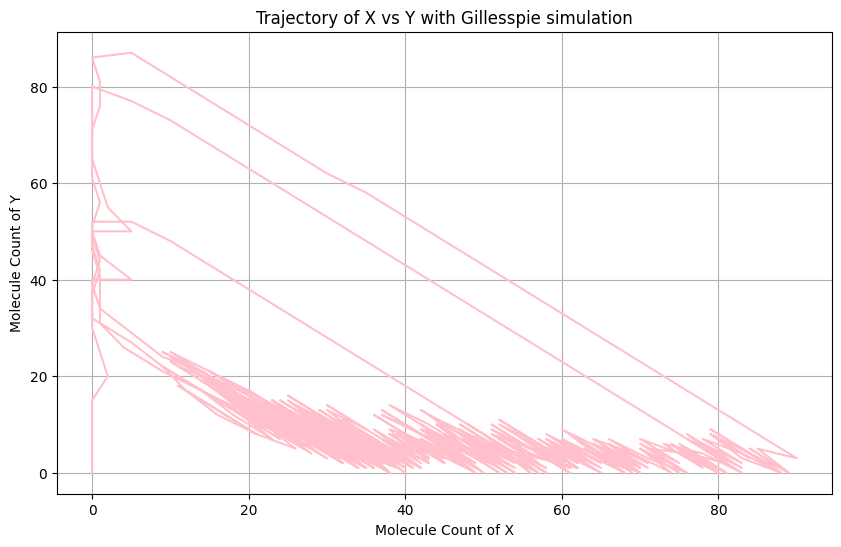

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Reaction rates:
k1 = 1
k2 = 2
k3 = 0.02
k4 = 0.04

# Initial conditions: 
# Initial count of X and Y:
X = 0
Y = 0
# Initial time:
t = 0
max_t = 500 

# Store time and molecule counts:
time = [t]
X_counts = [X]
Y_counts = [Y]

# Gillepsie simulation loop:
while t < max_t:
    # Compute propensities:
    a1 = k1 # Reaction 1(constant rate)
    a2 = k2 * X # Reaction 2 (proportional to X)
    a3 = k3 * X * (X-1) * Y / 2 if X > 1 else 0 # Reaction 3 (proportional to X^2 * Y)
    a4 = k4 * X # Reaction 4 (proportional to X)
    # Compute total propensity:
    a0 = a1 + a2 + a3 + a4

    # If no reaction can occur, break the loop:
    if a0 == 0:
        break

    # Time step:
    dt = np.random.exponential(1/a0)

    # Determine which reaction ocurrs next:
    r = np.random.uniform(0, a0)
    if r < a1:
        X +=1
    elif r < a1 + a2:
        X -= 1
        Y += 1
    elif r < a1 + a2 + a3:
        X += 1
        Y -= 1
    else:
        X -= 1

    # Update time: 
    t += dt

    # Store counts only when X or Y change by at least 5: 
    if abs(X - X_counts[-1]) >= 5 or abs(Y - Y_counts[-1]) >= 5:
        time.append(t)
        X_counts.append(X)
        Y_counts.append(Y)

# Plot numbers of X and Y in different colours on the same graph and label them:
plt.figure(figsize=(10, 6))
plt.plot(time, X_counts, label='X', color = 'blue')
plt.plot(time, Y_counts, label='Y', color = 'green', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Molecule Count')
plt.title ('Gillesspie simulation of X and Y over time')
plt.legend()
plt.grid()
plt.show()

# Plot the trajectory of X vs Y:
plt.figure(figsize=(10, 6))
plt.plot(X_counts, Y_counts, color = 'pink')
plt.xlabel('Molecule Count of X')
plt.ylabel('Molecule Count of Y')
plt.title('Trajectory of X vs Y with Gillesspie simulation')
plt.grid()
plt.show()






### **Describe how these plots compare with the ODE model:**
1. **Molecule Counts over time (Gillepsie simulation) vs. ODE:**
+ The blue and green (X and Y respectively) curves have sharp, irregular jumps, unlike the smooth ODE curves. 
+ The system undergoes repeated bursys when X spikes and then declines. 
+ Y follows a more gradual pattern, peaking before X does. 
+ At some point, using Gillepsie, X drops to zero, which never happens in the ODE model. 
+ In the ODE model, X and Y increase smootly and settle into an equilibrium state. 
+ In the Gillepsie model, there are random bursts and periods of zero molecules. 
+ The randomness in reaction times make the Gillepsie solution less predictable than the ODE one. 
+ The peaks of X appear at irregular intervals, rather than occuring at a fixed time like in the ODE model. 
+ The ODE models shows a continuous evolution, which reaches a state of equilbirum eventually, while the Gillepsie simulation captures randomness that occurs in small molecule counts. 

2. **Trajectory of X vs Y:**
+ The ODE trajectory was a smooth path, leading to an equilibrium. 
+ On the other hand, the Gillepsie trajectory fluctuates a lot, meaning the system does not follow a single, predictable path. 
+ The Gillepsie model captures random molecular count fluctuations and noise, which can cause the system to jump between states unpredictably. 

3. **Final Observations:**
+ The ODE Model is smooth, with continuous changes while the Gillepsie simulation is random and discrete. 
+ The trajectory plot of the ODE model shows a single, smooth and predictable path, while Gillepsie has many noisy, unpredictable paths. 
+ In large molecule counts, the ODE models is a good approximation, as it ignores small fluctuations. 
+ When molecule counts are low, the Gillepsie simulation provides more realistic insights, as it captures molecular randomness and noise better. 
+ In the Gillepsie plot, X drops randomly to zero, which never happens in the ODE model's plot. 
+ In conclusion, Gillepsie is better to use for modelling systems with low molecule counts, while ODEs are better for larger molecule counts.  




